In [9]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

For when doing GPU work

In [10]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **IPPR CNN Model**

### **Setting up Data**

Import image data from dataset containing 10000 positive images and 10000 negative images with each image resized to 128 x 128 pixels large. The dataset used here takes a random data from the three datasets that were chosen for the project. Kaggle links: 
- https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/data
- https://www.kaggle.com/datasets/aniruddhsharma/structural-defects-network-concrete-crack-images
- https://www.kaggle.com/datasets/yatata1/crack-dataset

The data is shuffled and then split into training, testing and validation sets.

In [11]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'Data',
    image_size=(128, 128),
    batch_size=128,
    validation_split=0.2,  # 20% for validation
    subset="training",      # Specify this is the training subset
    seed=7,               # For reproducibility
    shuffle=True            # Shuffle the data
)


val_data = tf.keras.utils.image_dataset_from_directory(
    'Data',
    image_size=(128, 128),
    batch_size=128,
    validation_split=0.2,  # Use 20% of data for validation
    subset="validation",    # Validation subset
    seed=7, 
    shuffle=True
)


Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


The images are converted into grayscale to better the training of the model.

In [12]:
# Function to convert images to grayscale
def convert_to_grayscale(images, labels):
    images = tf.image.rgb_to_grayscale(images)  # Convert RGB to grayscale
    return images, labels

# Apply the grayscale conversion to both datasets
train_data = train_data.map(convert_to_grayscale)
val_data = val_data.map(convert_to_grayscale)

### **Visualisation of the images**

In [13]:
images, labels = [], []
for img_batch, lbl_batch in val_data:
    images.append(img_batch.numpy())
    labels.append(lbl_batch.numpy())

all_images = np.concatenate(images)
all_labels = np.concatenate(labels)


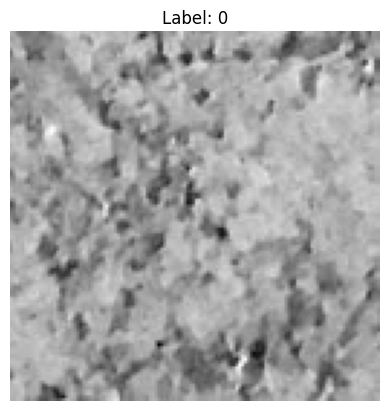

In [37]:
first_image = all_images[1].squeeze()  
first_label = all_labels[1]

plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {first_label}")
plt.axis('off')
plt.show()

### **Model Building**

In [24]:
model = Sequential()

model.add(tf.keras.Input(shape=(128,128,1)))
model.add(Conv2D(64, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

### **Compiling Model**

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 128)      

In [26]:
hist = model.fit(train_data, epochs = 20, validation_data = val_data)

Epoch 1/20


2024-11-01 19:31:55.843557: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-11-01 19:32:00.056076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-11-01 19:32:00.115208: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff2ab2f7890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-01 19:32:00.115257: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-01 19:32:00.146915: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-01 19:32:00.379821: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

125/125 [==============================] - 19s 89ms/step - loss: 0.7073 - accuracy: 0.5486 - val_loss: 0.6857 - val_accuracy: 0.5073
Epoch 2/20
125/125 [==============================] - 10s 83ms/step - loss: 0.2798 - accuracy: 0.9071 - val_loss: 0.3844 - val_accuracy: 0.8610
Epoch 3/20
125/125 [==============================] - 10s 82ms/step - loss: 0.2246 - accuracy: 0.9220 - val_loss: 0.2974 - val_accuracy: 0.9137
Epoch 4/20
125/125 [==============================] - 10s 82ms/step - loss: 0.2251 - accuracy: 0.9199 - val_loss: 0.2797 - val_accuracy: 0.9262
Epoch 5/20
125/125 [==============================] - 10s 82ms/step - loss: 0.2141 - accuracy: 0.9248 - val_loss: 0.2212 - val_accuracy: 0.9197
Epoch 6/20
125/125 [==============================] - 10s 82ms/step - loss: 0.2156 - accuracy: 0.9210 - val_loss: 0.3975 - val_accuracy: 0.8720
Epoch 7/20
125/125 [==============================] - 10s 81ms/step - loss: 0.2273 - accuracy: 0.9193 - val_loss: 1.0245 - val_accuracy: 0.8515
Epo

### **Plotting and Presenting Results**

Plotting training and validation loss

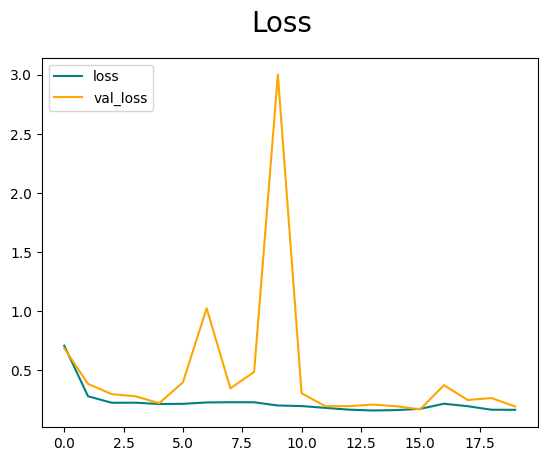

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting training and validation accuracy

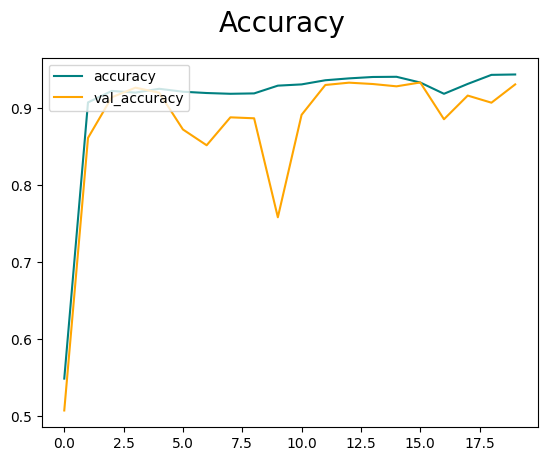

In [28]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


pred = model.predict(all_images)
pred = np.around(pred)

conf_matrix= confusion_matrix(all_labels, pred)

report = classification_report(all_labels, pred, output_dict=True)

precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print("Confusion Matrix:\n", conf_matrix)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 Score (weighted):", f1_score)

125/125 [==============================] - 1s 9ms/step
Confusion Matrix:
 [[1881  101]
 [ 177 1841]]
Precision (weighted): 0.9311459542475222
Recall (weighted): 0.9305
F1 Score (weighted): 0.9304867936793679
